In [1]:
import numpy as np
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
from textwrap import wrap
from sfers.utils.simulator_evaluation import get_center_mass_positions

In [3]:
matplotlib.rcParams.update({'font.size': 28})

# act1 on time

In [5]:
def setup_plot():
    plt.xlabel("Relative delay (s)")
    plt.ylabel("Moving (mm)")
    plt.xlim((0, 0.06))
    # plt.xticks([0, 0.005, 0.01, 0.015, 0.02])
    plt.ylim((-0.2, 4))
    plt.yticks([0, 1, 2, 3, 4])
    # plt.savefig('inchworm-crawl-14Hz-act1-act3.pdf', transparent=True, bbox_inches = "tight")

In [6]:
def get_x_move_max(filename):
    loadFile = filename
    npzFile=np.load(loadFile);
    N=npzFile['N'];
    m=npzFile['m'];
    period=npzFile['period'];
    dataTime=npzFile['dataTime']; # in s
    dataTheta=npzFile['dataTheta'];
    dataPositions=npzFile['dataPositions'];
    dataAngularVelocities=npzFile['dataAngularVelocities'];
    dataTor=npzFile['dataTor'];
    dataMotorVoltages=npzFile['dataMotorVoltages'];
    timeStep=npzFile['timeStep']; # in s
    simCycles=npzFile['simCycles'];
    recordStepInterval=npzFile['recordStepInterval'];
    frictionCoefficient = npzFile['frictionHigh']
    xPositions1 = dataPositions[:,0,0] - dataPositions[0,0,0]
    xPositions2 = dataPositions[:,-1,0] - dataPositions[0,-1,0]
    xSums = xPositions1 + xPositions2
    xSumMax = np.max(xSums)
    return period, xSumMax

In [7]:
def evaluate_plot(foldername, filename=None):  
    filenames = glob.glob(foldername+'/'+'EfficientMover_ActuatorLength10.0cm_N_5_m_3_Period_*.npz')
    if filename is not None:
        filenames.remove(foldername + '/' + filename)
    moves = []
    delays = []
    for filename in filenames:
        delay, xSumMax = get_x_move_max(filename)
        moves.append(xSumMax)
        delays.append(delay)
    delays = np.array(delays)
    moves = np.array(moves)
    sortidx = delays.argsort()
    delays = delays[sortidx]
    moves = moves[sortidx]
    plt.figure(figsize=(10, 8))
    plt.plot(delays, 10*moves,'o-', 
             )
    setup_plot()
    plt.show()
    return delays, moves

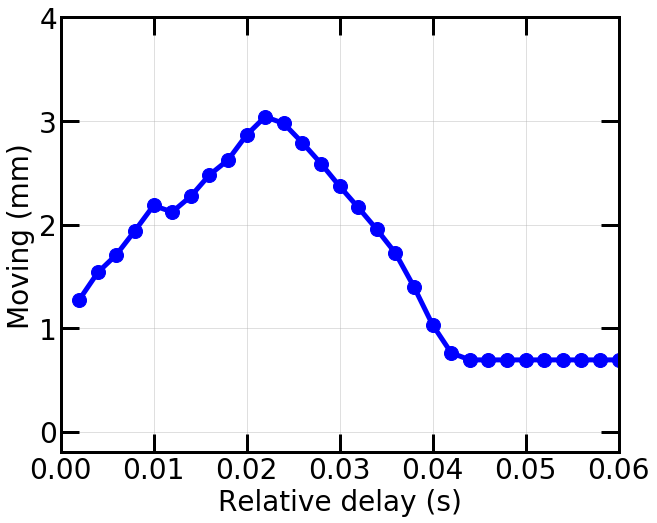

In [8]:
foldername = 'EfficientMover_N_5_m_3-PeriodScan_12_29_2021_17_09'
delays, moves = evaluate_plot(foldername=foldername)

In [9]:
delays[np.argmax(moves)]

0.022

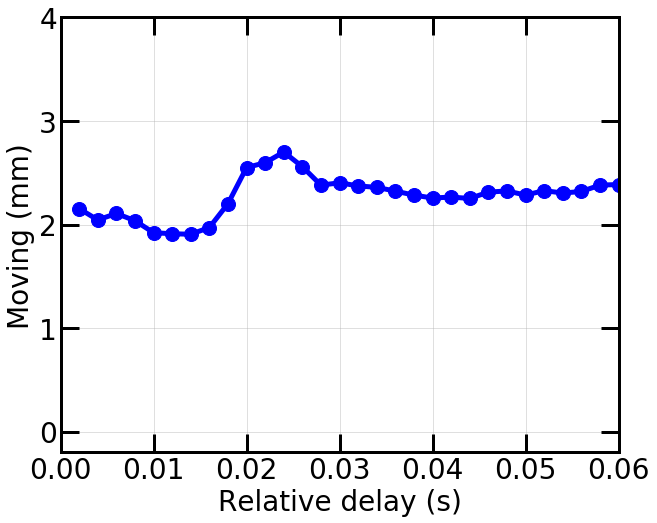

In [10]:
foldername = 'EfficientMover_N_5_m_3-PeriodScan_12_29_2021_22_17'
delays, moves = evaluate_plot(foldername=foldername)

In [11]:
delays[np.argmax(moves)]

0.024

# Shrink (Copy1)

In [14]:
def setup_plot():
    plt.xlabel("Relative delay (s)")
    plt.ylabel("Jumping height (mm)")
    plt.xlim((0, 0.15))
    plt.xticks([0, 0.05, 0.1, 0.15])
    plt.ylim((-0.2, 4))
    plt.yticks([0, 1, 2, 3, 4])
    # plt.savefig('inchworm-crawl-14Hz-act1-act3.pdf', transparent=True, bbox_inches = "tight")

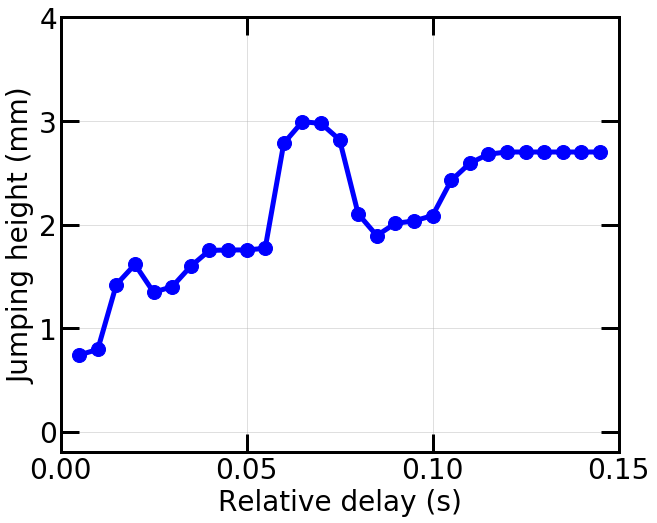

In [15]:
foldername = 'EfficientMover_N_5_m_3-PeriodScan_12_30_2021_12_55'
delays, moves = evaluate_plot(foldername=foldername)

In [16]:
delays[np.argmax(moves)]

0.065

# Switch 1 and 5 (Copy3)

In [8]:
def setup_plot():
    plt.xlabel("Relative delay (s)")
    plt.ylabel("Moving (mm)")
    plt.xlim((0, 0.15))
    plt.xticks([0, 0.05, 0.1, 0.15])
    plt.ylim((-0.2, 8))
    plt.yticks([0, 2, 4, 6, 8])

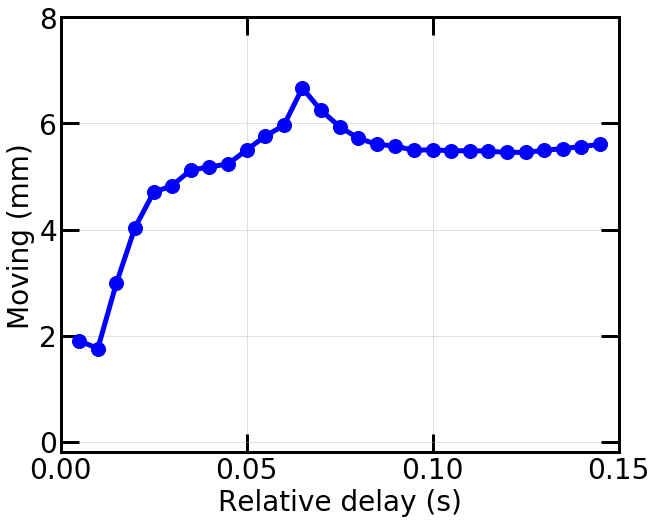

In [9]:
foldername = 'EfficientMover_N_5_m_3-PeriodScan_12_30_2021_20_02'
delays, moves = evaluate_plot(foldername=foldername)

In [10]:
delays[np.argmax(moves)]

0.065

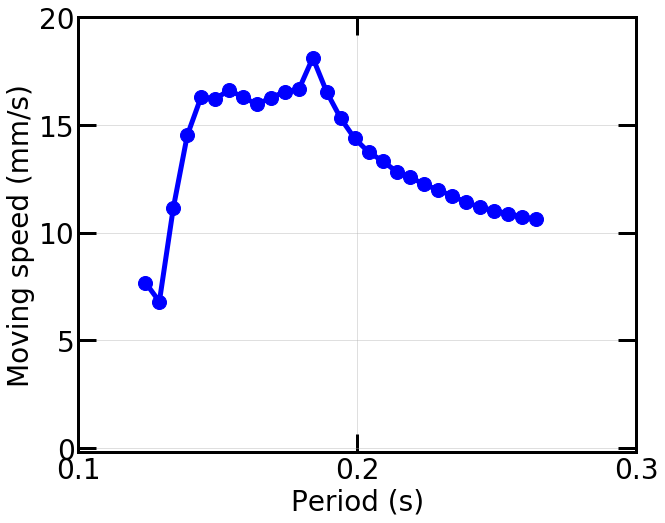

In [12]:
periods = delays + 0.024 + 0.065 + 0.03
speeds = moves / 2 / periods
plt.figure(figsize=(10, 8))
plt.plot(periods, 10*speeds,'o-', 
         )
plt.xlabel("Period (s)")
plt.ylabel("Moving speed (mm/s)")
plt.xlim((0.1, 0.3))
plt.xticks([0.1, 0.2, 0.3])
plt.ylim((-0.2, 20))
plt.yticks([0, 5, 10, 15, 20])
plt.show()